In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
heart= pd.read_csv('G:\Extra\My Works\Data Science\Data Analysis and Visualization\heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print("The shape of this dataframe is{}".format(heart.shape))

The shape of this dataframe is(303, 14)


In [8]:
heart= heart.rename(columns={'trtbps':'rsbp','thalachh':'maxhr','exng':'exang','output':'risk'})
heart.head()

,age,sex,cp,rsbp,chol,fbs,restecg,maxhr,exang,oldpeak,slp,caa,thall,risk
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
heart.isnull().sum()

age        0
sex        0
cp         0
rsbp       0
chol       0
fbs        0
restecg    0
maxhr      0
exang      0
oldpeak    0
slp        0
caa        0
thall      0
risk       0
dtype: int64

In [10]:
# Counting distinct values in each column

for i in list(heart.columns):
    print("{}-{}".format(i,heart[i].value_counts().shape[0]))

age-41
sex-2
cp-4
rsbp-49
chol-152
fbs-2
restecg-3
maxhr-91
exang-2
oldpeak-40
slp-3
caa-5
thall-4
risk-2


In [11]:
cat_cols = ['sex','cp','fbs','restecg','exang','slp','caa','thall','risk']
con_cols = ['age','rsbp','chol','maxhr','oldpeak']

In [12]:
print("categorical columns are:", cat_cols)
print("continuous columns are:", con_cols)

categorical columns are: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slp', 'caa', 'thall', 'risk']
continuous columns are: ['age', 'rsbp', 'chol', 'maxhr', 'oldpeak']


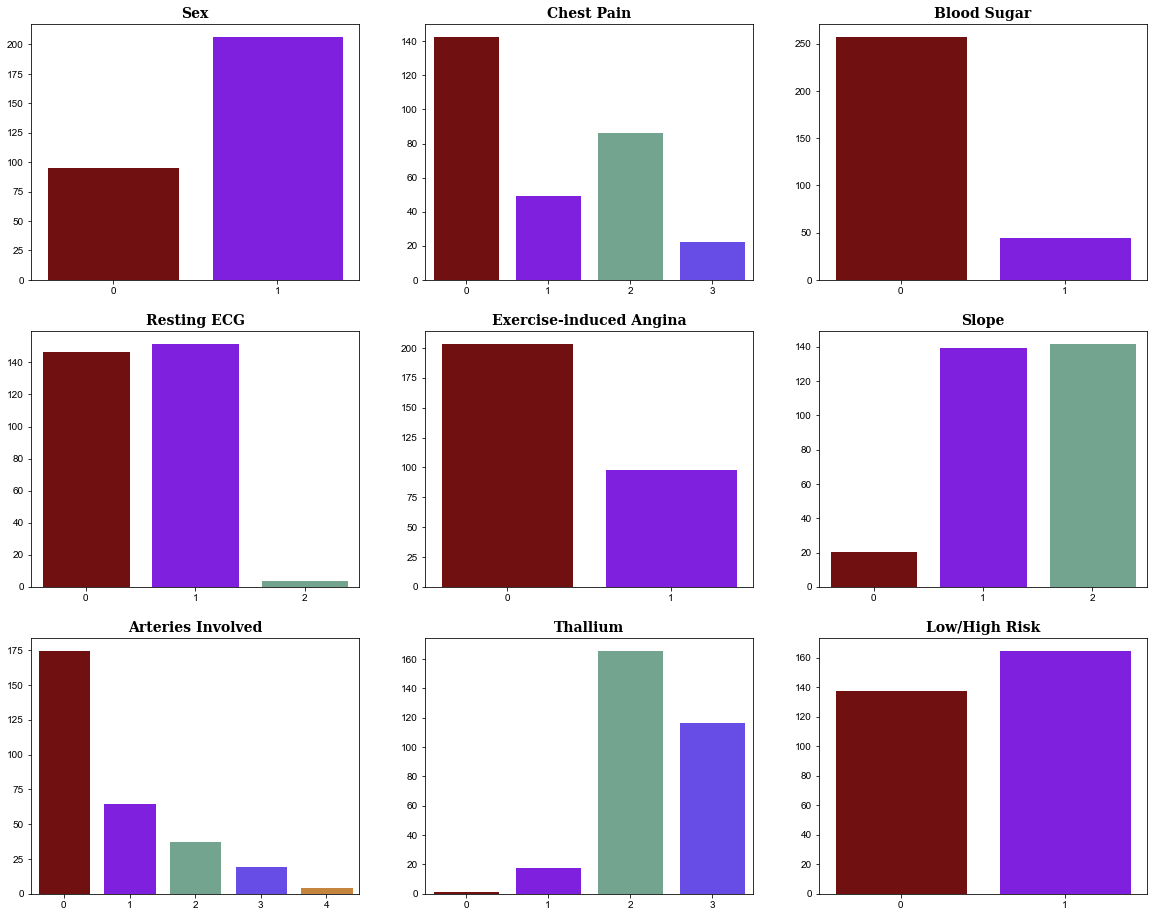

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(20, 16))
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": "-"})

# Sex
sns.countplot(ax=axs[0,0], data=heart, x='sex', palette=color_palette)
axs[0,0].set_title('Sex', fontsize=14, fontweight='bold', fontfamily='serif')
axs[0,0].set_xlabel("")
axs[0,0].set_ylabel("");

# Chest Pain
sns.countplot(ax=axs[0,1], data=heart, x='cp',palette=color_palette)
axs[0,1].set_title('Chest Pain', fontsize=14, fontweight='bold', fontfamily='serif')
axs[0,1].set_xlabel("")
axs[0,1].set_ylabel("");

# Fasting Blood Sugar
sns.countplot(ax=axs[0,2], data=heart, x='fbs',palette=color_palette)
axs[0,2].set_title('Blood Sugar', fontsize=14, fontweight='bold', fontfamily='serif')
axs[0,2].set_xlabel("")
axs[0,2].set_ylabel("");

# Resting ECG
sns.countplot(ax=axs[1,0], data=heart, x='restecg',palette=color_palette)
axs[1,0].set_title('Resting ECG', fontsize=14, fontweight='bold', fontfamily='serif')
axs[1,0].set_xlabel("")
axs[1,0].set_ylabel("");

# Angina
sns.countplot(ax=axs[1,1], data=heart, x='exang',palette=color_palette)
axs[1,1].set_title('Exercise-induced Angina', fontsize=14, fontweight='bold', fontfamily='serif')
axs[1,1].set_xlabel("")
axs[1,1].set_ylabel("");

# Slope
sns.countplot(ax=axs[1,2], data=heart, x='slp',palette=color_palette)
axs[1,2].set_title('Slope', fontsize=14, fontweight='bold', fontfamily='serif')
axs[1,2].set_xlabel("")
axs[1,2].set_ylabel("");

# Number of Vessels
sns.countplot(ax=axs[2,0], data=heart, x='caa',palette=color_palette)
axs[2,0].set_title('Arteries Involved', fontsize=14, fontweight='bold', fontfamily='serif')
axs[2,0].set_xlabel("")
axs[2,0].set_ylabel("");

# Thallium Score
sns.countplot(ax=axs[2,1], data=heart, x='thall',palette=color_palette)
axs[2,1].set_title('Thallium', fontsize=14, fontweight='bold', fontfamily='serif')
axs[2,1].set_xlabel("")
axs[2,1].set_ylabel("");

# Low vs High Risk
sns.countplot(ax=axs[2,2], data=heart, x='risk',palette=color_palette)
axs[2,2].set_title('Low/High Risk', fontsize=14, fontweight='bold', fontfamily='serif')
axs[2,2].set_xlabel("")
axs[2,2].set_ylabel("");


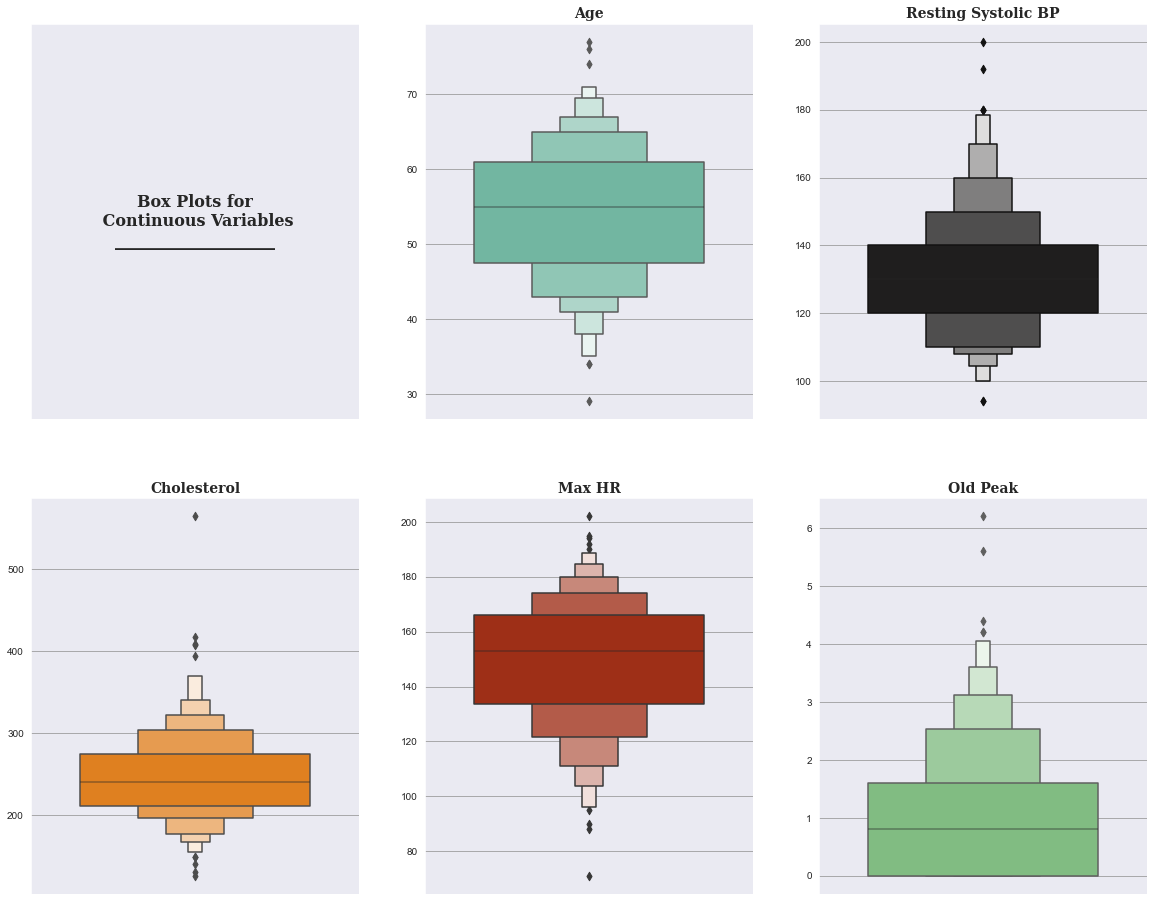

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(20, 16))
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": "-"})

# Title Plot
axs[0,0].text(0.5,0.5,'Box Plots for\n Continuous Variables\n____________________',
              horizontalalignment='center',
              verticalalignment='center',
              fontsize=16, fontweight='bold',
              fontfamily='serif')
axs[0,0].set_xticklabels([])
axs[0,0].set_yticklabels([])
axs[0,0].grid(False);

sns.boxenplot(ax=axs[0,1], y=heart['age'],palette='Set2',width=0.7)
axs[0,1].set_title("Age", fontsize=14, fontweight='bold',fontfamily='serif')
axs[0,1].set_xlabel("")
axs[0,1].set_ylabel("");

sns.boxenplot(ax=axs[0,2], y=heart['rsbp'],palette='icefire',width=0.7)
axs[0,2].set_title("Resting Systolic BP", fontsize=14, fontweight='bold',fontfamily='serif')
axs[0,2].set_xlabel("")
axs[0,2].set_ylabel("");

sns.boxenplot(ax=axs[1,0], y=heart['chol'],palette='autumn',width=0.7)
axs[1,0].set_title("Cholesterol", fontsize=14, fontweight='bold',fontfamily='serif')
axs[1,0].set_xlabel("")
axs[1,0].set_ylabel("");

sns.boxenplot(ax=axs[1,1], y=heart['maxhr'],palette='gnuplot',width=0.7)
axs[1,1].set_title("Max HR", fontsize=14, fontweight='bold',fontfamily='serif')
axs[1,1].set_xlabel("")
axs[1,1].set_ylabel("");

sns.boxenplot(ax=axs[1,2], y=heart['oldpeak'],palette='YlGn',width=0.7)
axs[1,2].set_title("Old Peak", fontsize=14, fontweight='bold',fontfamily='serif')
axs[1,2].set_xlabel("")
axs[1,2].set_ylabel("");

In [15]:
heart_corr = heart[con_cols].corr()
heart_corr

,age,rsbp,chol,maxhr,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
rsbp,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
maxhr,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


In [16]:
corr_mat = heart.corr().stack().reset_index(name='correlation')
corr_mat

,level_0,level_1,correlation
0,age,age,1.000000
1,age,sex,-0.098447
2,age,cp,-0.068653
3,age,rsbp,0.279351
4,age,chol,0.213678
...,...,...,...
191,risk,oldpeak,-0.430696
192,risk,slp,0.345877
193,risk,caa,-0.391724
194,risk,thall,-0.344029


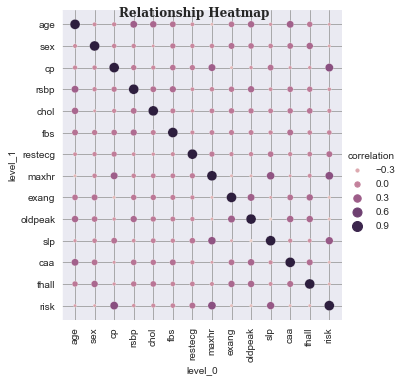

In [17]:
c = sns.relplot(data=corr_mat, x='level_0', y='level_1',
                hue='correlation', size='correlation',
                sizes=(10,100), size_norm=(-0.2,0.8))
c.fig.suptitle('Relationship Heatmap', fontweight='bold',
            fontfamily='serif')
c.set_xticklabels(rotation=90);

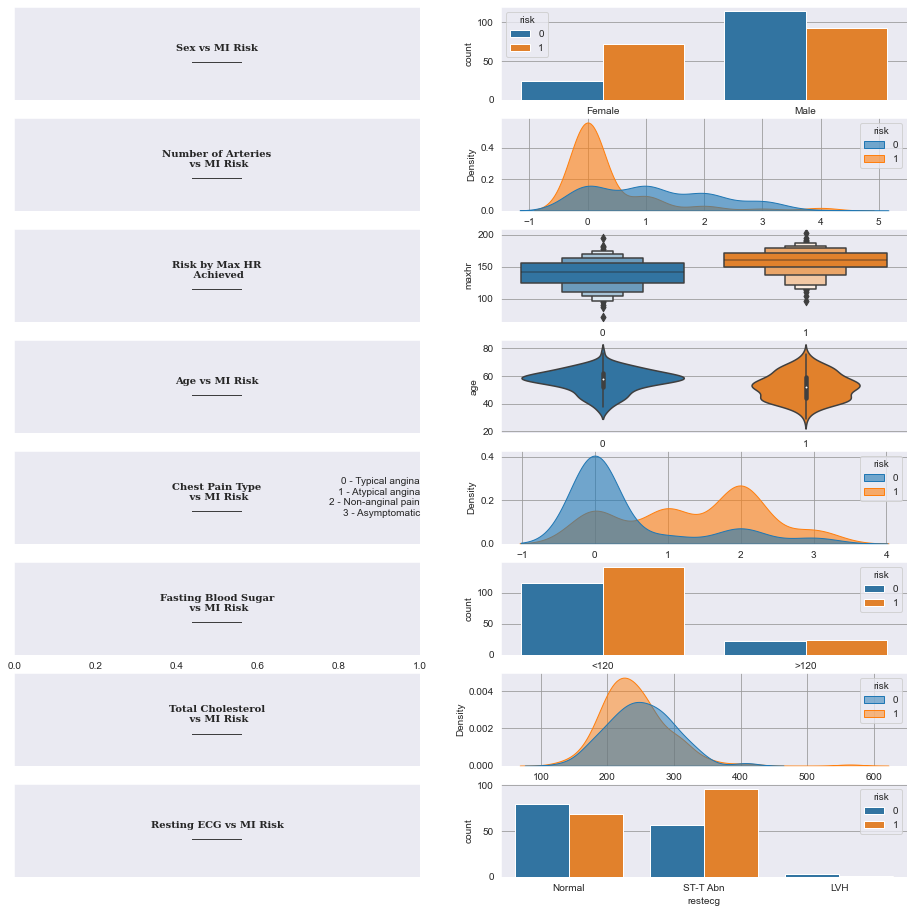

In [18]:
fig, axs = plt.subplots(8,2,figsize=(16,16))

# Sex vs MI Risk
axs[0,0].text(0.5,0.5,'Sex vs MI Risk\n__________',
              horizontalalignment='center',
              verticalalignment='center',
              fontweight='bold',fontfamily='serif')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].grid(False)
sns.countplot(ax=axs[0,1], x='sex', hue='risk', data=heart)
# I renamed the xticks from '0' and '1' to 'Female' and 'Male', respectively.
axs[0,1].set(xticks=([0,1]))
axs[0,1].set(xticklabels=(['Female','Male']))

axs[1,0].text(0.5,0.5,'Number of Arteries\n vs MI Risk\n__________',
              horizontalalignment='center',
              verticalalignment='center',
              fontweight='bold',fontfamily='serif')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].grid(False)
sns.kdeplot(ax=axs[1,1], x='caa', hue='risk', data=heart,
                fill=True, alpha=0.6);

axs[2,0].text(0.5,0.5,'Risk by Max HR\n Achieved\n__________',
              horizontalalignment='center',
              verticalalignment='center',
              fontweight='bold',fontfamily='serif')
axs[2,0].set_xticks([])
axs[2,0].set_yticks([])
axs[2,0].grid(False)
sns.boxenplot(ax=axs[2,1], x='risk', y='maxhr', data=heart);

axs[3,0].text(0.5,0.5,'Age vs MI Risk\n__________',
             horizontalalignment='center',
             verticalalignment='center',
             fontweight='bold',fontfamily='serif')
axs[3,0].set_xticks([])
axs[3,0].set_yticks([])
axs[3,0].grid(False)
sns.violinplot(ax=axs[3,1],x='risk',y='age',data=heart);

axs[4,0].text(0.5,0.5,'Chest Pain Type\n vs MI Risk\n__________',
              horizontalalignment='center',
              verticalalignment='center',
              fontweight='bold',fontfamily='serif')
axs[4,0].text(1,0.5,'0 - Typical angina\n1 - Atypical angina\n2 - Non-anginal pain\n3 - Asymptomatic',
              horizontalalignment='right',
              verticalalignment='center',)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([])
axs[4,0].grid(False)
sns.kdeplot(ax=axs[4,1], x='cp', hue='risk', data=heart,
                fill=True, alpha=0.6);

axs[5,0].text(0.5,0.5,'Fasting Blood Sugar\n vs MI Risk\n__________',
              horizontalalignment='center',
              verticalalignment='center',
              fontweight='bold',fontfamily='serif')
axs[5,0].set_yticks([])
axs[5,0].grid(False)
sns.countplot(ax=axs[5,1], x='fbs', hue='risk', data=heart)
axs[5,1].set(xticks=([0,1]))
axs[5,1].set(xticklabels=(['<120','>120']));

axs[6,0].text(0.5,0.5,'Total Cholesterol\n vs MI Risk\n__________',
              horizontalalignment='center',
              verticalalignment='center',
              fontweight='bold',fontfamily='serif')
axs[6,0].set_xticks([])
axs[6,0].set_yticks([])
axs[6,0].grid(False)
sns.kdeplot(ax=axs[6,1], x='chol', hue='risk', data=heart, fill=True, alpha=0.5);

axs[7,0].text(0.5,0.5,'Resting ECG vs MI Risk\n__________',
              horizontalalignment='center',
              verticalalignment='center',
              fontweight='bold',fontfamily='serif')
#axs[7,0].text(1,0.5,'0 - Normal ECG\n1 - ST-T Abn\n2 - LVH',
#              horizontalalignment='right',
#              verticalalignment='center',)
axs[7,0].set_xticks([])
axs[7,0].set_yticks([])
axs[7,0].grid(False)
sns.countplot(ax=axs[7,1], x='restecg', hue='risk', data=heart)
axs[7,1].set(xticks=([0,1,2]))
axs[7,1].set(xticklabels=(['Normal','ST-T Abn','LVH']));

In [19]:
feat = heart.drop(columns=['risk'],axis=1)
target = heart['risk']

NameError: name 'train_test_split' is not defined